In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [62]:
X, y = data['data'], data['target']

In [63]:
data['feature_names']  #the meaning of each num

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [64]:
data['DESCR']  #description 

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
X[0], X[1]

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]),
 array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]))

In [15]:
len(X[:]),len(y[:])

(506, 506)

In [16]:
%matplotlib inline

In [17]:
import random

In [18]:
import matplotlib.pyplot as plt

In [19]:
def price(rm, k, b):
    # price = house price, rm = room number, f(x) = kx + b
    return k* rm + b     

In [20]:
def draw_rm_price():
    plt.scatter(X[: , 5] , y)

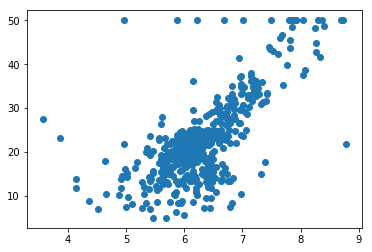

In [21]:
draw_rm_price()

In [33]:
X_rm =  X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(rm, k, b )  for  rm in X_rm]

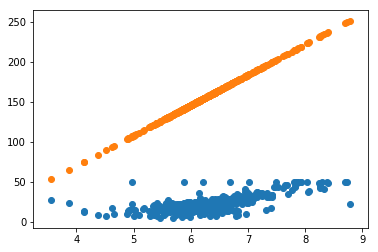

In [34]:
draw_rm_price()
plt.scatter(X_rm, price_by_random_k_and_b)

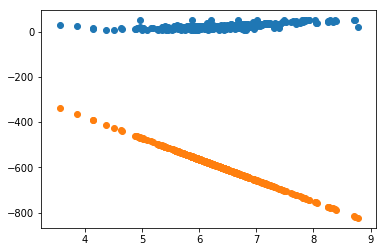

In [35]:
X_rm =  X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(rm, k, b )  for  rm in X_rm]
draw_rm_price()
plt.scatter(X_rm, price_by_random_k_and_b)

# loss (different function than class)

# $$ loss = \frac{1}{n} \sum{|(y_i - \hat{y_i}|)}$$

In [46]:
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

# 1. Random Choose Method to get optimal k and b

In [44]:
trying_times = 2000

min_loss = float('inf')  # the infinity big, everything num is smaller than that number

best_k, best_b = None, None
for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 22.92165689588137 best_b: -67.64172888709325, and the loss is: 53.95651283723997
When time is : 1, get best_k: 1.3474327030209992 best_b: 38.888966089107726, and the loss is: 24.895167941511087
When time is : 34, get best_k: 13.634814997955516 best_b: -56.739714181294396, and the loss is: 7.756850454978111
When time is : 75, get best_k: 1.925187935418478 best_b: 10.120379774254644, and the loss is: 5.924406999705465
When time is : 76, get best_k: 15.77507688179844 best_b: -76.11297391614322, and the loss is: 5.4519169993992715
When time is : 111, get best_k: 12.762891510699632 best_b: -57.41849408470006, and the loss is: 4.698252220795102


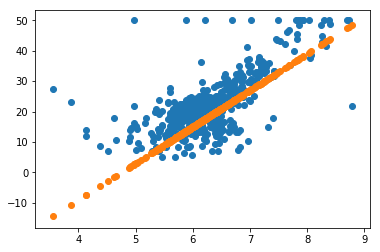

In [45]:
X_rm = X[:, 5]
k = 12
b = -57
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_price()
plt.scatter(X_rm, price_by_random_k_and_b)

# 2.Supervised Direction to get optimal k and b

In [59]:
trying_times = 1000
min_loss = float('inf') 
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
direction =  [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]
next_direction = random.choice(direction)
scalar = 0.1

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k , current_b = best_k + k_direction* scalar , best_b + b_direction* scalar
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k , current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -78.53657434406765 best_b: -13.042815267761574, and the loss is: 529.1492773794091
When time is : 6, get best_k: -78.43657434406765 best_b: -13.142815267761573, and the loss is: 528.6208139406734
When time is : 7, get best_k: -78.33657434406766 best_b: -13.242815267761573, and the loss is: 528.0923505019388
When time is : 8, get best_k: -78.23657434406766 best_b: -13.342815267761573, and the loss is: 527.5638870632038
When time is : 9, get best_k: -78.13657434406767 best_b: -13.442815267761572, and the loss is: 527.0354236244685
When time is : 10, get best_k: -78.03657434406767 best_b: -13.542815267761572, and the loss is: 526.5069601857334
When time is : 11, get best_k: -77.93657434406768 best_b: -13.642815267761572, and the loss is: 525.9784967469982
When time is : 12, get best_k: -77.83657434406769 best_b: -13.742815267761571, and the loss is: 525.4500333082632
When time is : 13, get best_k: -77.73657434406769 best_b: -13.842815267761571, and the loss i

When time is : 138, get best_k: -65.2365743440684 best_b: -26.34281526776171, and the loss is: 458.86364002763514
When time is : 139, get best_k: -65.1365743440684 best_b: -26.442815267761713, and the loss is: 458.3351765889004
When time is : 140, get best_k: -65.03657434406841 best_b: -26.542815267761714, and the loss is: 457.80671315016514
When time is : 141, get best_k: -64.93657434406842 best_b: -26.642815267761716, and the loss is: 457.2782497114299
When time is : 142, get best_k: -64.83657434406842 best_b: -26.742815267761717, and the loss is: 456.7497862726949
When time is : 143, get best_k: -64.73657434406843 best_b: -26.84281526776172, and the loss is: 456.22132283395985
When time is : 144, get best_k: -64.63657434406844 best_b: -26.94281526776172, and the loss is: 455.6928593952243
When time is : 145, get best_k: -64.53657434406844 best_b: -27.04281526776172, and the loss is: 455.1643959564896
When time is : 146, get best_k: -64.43657434406845 best_b: -27.142815267761723, and

When time is : 254, get best_k: -53.63657434406832 best_b: -37.94281526776187, and the loss is: 397.5618811343546
When time is : 255, get best_k: -53.53657434406832 best_b: -38.042815267761874, and the loss is: 397.03341769561945
When time is : 256, get best_k: -53.43657434406832 best_b: -38.142815267761875, and the loss is: 396.50495425688405
When time is : 257, get best_k: -53.33657434406832 best_b: -38.24281526776188, and the loss is: 395.97649081814853
When time is : 258, get best_k: -53.236574344068316 best_b: -38.34281526776188, and the loss is: 395.4480273794136
When time is : 259, get best_k: -53.136574344068315 best_b: -38.44281526776188, and the loss is: 394.91956394067864
When time is : 260, get best_k: -53.03657434406831 best_b: -38.54281526776188, and the loss is: 394.3911005019433
When time is : 261, get best_k: -52.93657434406831 best_b: -38.64281526776188, and the loss is: 393.8626370632077
When time is : 262, get best_k: -52.83657434406831 best_b: -38.742815267761884, 

When time is : 379, get best_k: -41.136574344068144 best_b: -50.44281526776205, and the loss is: 331.5039512924565
When time is : 380, get best_k: -41.03657434406814 best_b: -50.54281526776205, and the loss is: 330.9754878537214
When time is : 381, get best_k: -40.93657434406814 best_b: -50.64281526776205, and the loss is: 330.4470244149865
When time is : 382, get best_k: -40.83657434406814 best_b: -50.742815267762055, and the loss is: 329.9185609762508
When time is : 383, get best_k: -40.73657434406814 best_b: -50.842815267762056, and the loss is: 329.3900975375157
When time is : 384, get best_k: -40.63657434406814 best_b: -50.94281526776206, and the loss is: 328.86163409878037
When time is : 385, get best_k: -40.536574344068136 best_b: -51.04281526776206, and the loss is: 328.3331706600453
When time is : 386, get best_k: -40.436574344068134 best_b: -51.14281526776206, and the loss is: 327.80470722131
When time is : 387, get best_k: -40.33657434406813 best_b: -51.24281526776206, and t

When time is : 515, get best_k: -27.53657434406795 best_b: -64.04281526776224, and the loss is: 259.63292362447083
When time is : 516, get best_k: -27.43657434406795 best_b: -64.14281526776223, and the loss is: 259.10446018573595
When time is : 517, get best_k: -27.336574344067948 best_b: -64.24281526776223, and the loss is: 258.5759967470009
When time is : 518, get best_k: -27.236574344067947 best_b: -64.34281526776222, and the loss is: 258.0475333082655
When time is : 519, get best_k: -27.136574344067945 best_b: -64.44281526776221, and the loss is: 257.51906986953026
When time is : 520, get best_k: -27.036574344067944 best_b: -64.54281526776221, and the loss is: 256.99060643079525
When time is : 521, get best_k: -26.936574344067942 best_b: -64.6428152677622, and the loss is: 256.4621429920602
When time is : 522, get best_k: -26.83657434406794 best_b: -64.7428152677622, and the loss is: 255.93367955332474
When time is : 523, get best_k: -26.73657434406794 best_b: -64.84281526776219, a

When time is : 632, get best_k: -15.836574344067788 best_b: -75.74281526776157, and the loss is: 197.80270129245358
When time is : 633, get best_k: -15.736574344067789 best_b: -75.84281526776157, and the loss is: 197.27423785371843
When time is : 634, get best_k: -15.636574344067789 best_b: -75.94281526776156, and the loss is: 196.74577441498292
When time is : 635, get best_k: -15.53657434406779 best_b: -76.04281526776155, and the loss is: 196.217310976248
When time is : 636, get best_k: -15.43657434406779 best_b: -76.14281526776155, and the loss is: 195.688847537513
When time is : 637, get best_k: -15.33657434406779 best_b: -76.24281526776154, and the loss is: 195.16038409877763
When time is : 638, get best_k: -15.23657434406779 best_b: -76.34281526776154, and the loss is: 194.63192066004243
When time is : 639, get best_k: -15.13657434406779 best_b: -76.44281526776153, and the loss is: 194.10345722130762
When time is : 640, get best_k: -15.036574344067791 best_b: -76.54281526776153, a

When time is : 736, get best_k: -5.436574344067825 best_b: -86.14281526776098, and the loss is: 142.8425036639948
When time is : 737, get best_k: -5.3365743440678255 best_b: -86.24281526776097, and the loss is: 142.3140402252596
When time is : 738, get best_k: -5.236574344067826 best_b: -86.34281526776097, and the loss is: 141.7855767865244
When time is : 739, get best_k: -5.136574344067826 best_b: -86.44281526776096, and the loss is: 141.25711334778913
When time is : 740, get best_k: -5.036574344067827 best_b: -86.54281526776096, and the loss is: 140.72864990905398
When time is : 741, get best_k: -4.936574344067827 best_b: -86.64281526776095, and the loss is: 140.20018647031878
When time is : 742, get best_k: -4.836574344067827 best_b: -86.74281526776095, and the loss is: 139.67172303158358
When time is : 743, get best_k: -4.736574344067828 best_b: -86.84281526776094, and the loss is: 139.14325959284838
When time is : 744, get best_k: -4.636574344067828 best_b: -86.94281526776093, and

When time is : 816, get best_k: 2.5634256559321735 best_b: -94.14281526776053, and the loss is: 100.56542856518008
When time is : 817, get best_k: 2.6634256559321736 best_b: -94.24281526776052, and the loss is: 100.03696512644484
When time is : 818, get best_k: 2.7634256559321737 best_b: -94.34281526776051, and the loss is: 99.5085016877097
When time is : 819, get best_k: 2.863425655932174 best_b: -94.44281526776051, and the loss is: 98.98003824897455
When time is : 820, get best_k: 2.963425655932174 best_b: -94.5428152677605, and the loss is: 98.45157481023939
When time is : 821, get best_k: 3.063425655932174 best_b: -94.6428152677605, and the loss is: 97.92311137150409
When time is : 822, get best_k: 3.163425655932174 best_b: -94.74281526776049, and the loss is: 97.39464793276892
When time is : 823, get best_k: 3.263425655932174 best_b: -94.84281526776049, and the loss is: 96.8661844940338
When time is : 824, get best_k: 3.3634256559321742 best_b: -94.94281526776048, and the loss is:

When time is : 975, get best_k: 18.463425655932166 best_b: -110.04281526775962, and the loss is: 16.87182361087754
When time is : 976, get best_k: 18.563425655932168 best_b: -110.14281526775962, and the loss is: 16.38763801577056
When time is : 977, get best_k: 18.66342565593217 best_b: -110.24281526775961, and the loss is: 15.909123375259751
When time is : 978, get best_k: 18.76342565593217 best_b: -110.3428152677596, and the loss is: 15.435150853198595
When time is : 979, get best_k: 18.863425655932172 best_b: -110.4428152677596, and the loss is: 14.965675563164059
When time is : 980, get best_k: 18.963425655932173 best_b: -110.5428152677596, and the loss is: 14.50020510870172
When time is : 981, get best_k: 19.063425655932175 best_b: -110.64281526775959, and the loss is: 14.043294766372696
When time is : 982, get best_k: 19.163425655932176 best_b: -110.74281526775958, and the loss is: 13.58816393352278
When time is : 983, get best_k: 19.263425655932178 best_b: -110.84281526775958, a

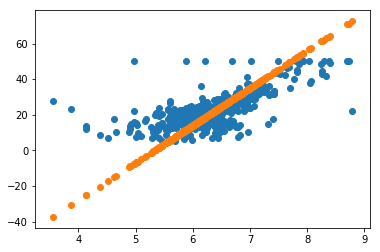

In [60]:
X_rm = X[:, 5]
k =21
b = -112
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_price()
plt.scatter(X_rm, price_by_random_k_and_b)

# 3.Gradient Descent to get optimal k and b

In [65]:
# to be continued 





## Answer following questions:
1. Why do we need machine learning methods instead of creating a complicated formula?

Ans: it is really hard to find a complicated formula somtimes, machine learning methods can give us a formula good enough to use.

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

Ans: the output is unpredictable,many of the computer resourse is wasted.

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

Ans: Yes, if the random number is way off at beginning, it might took much longer time to find a good answer.

4. Why do we use Derivative / Gredient to fit a target function?

Ans: to speed up the process to find the optimal answer

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans: Gredient means the loss function's  Partial derivative, Descent means the step to move to the right direction and get smaller loss

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: it can get a optimal answer much faster than the previous ones

7. Using the simple words to describe: What's the machine leanring.

Ans: by using past dataset, machine creat a fuction that can best simulate the dataset

# search problem--the optimal route based on Beijing Subway system